<a href="https://colab.research.google.com/github/Sandeepdora/Time-Series-Forecasting/blob/master/TimeSeriesForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

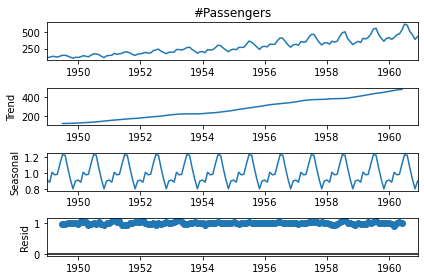

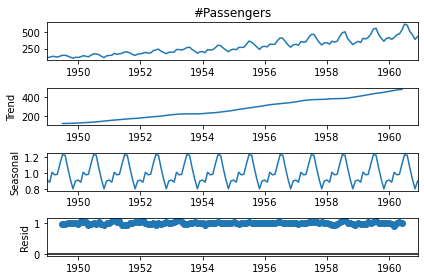

In [1]:
# Importing required libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose 

# Read the AirPassengers dataset 
airline = pd.read_csv('AirPassengers.csv', 
					index_col ='Month', 
					parse_dates = True) 

# Print the first five rows of the dataset 
airline.head() 

# ETS Decomposition 
result = seasonal_decompose(airline['#Passengers'], 
							model ='multiplicative') 

# ETS plot 
result.plot() 


In [0]:
# To install the library 
#!setup.py
#!pip install pmdarima 

In [6]:
# Import the library 
from pmdarima import auto_arima 

# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 

# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(airline['#Passengers'], start_p = 1, start_q = 1, 
						max_p = 3, max_q = 3, m = 12, 
						start_P = 0, seasonal = True, 
						d = None, D = 1, trace = True, 
						error_action ='ignore', # we don't want to know if an order does not work 
						suppress_warnings = True, # we don't want convergence warnings 
						stepwise = True)		 # set to stepwise 

# To print the summary 
stepwise_fit.summary() 


Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,12) [intercept=True]; AIC=1024.824, BIC=1039.200, Time=0.802 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=1033.479, BIC=1039.229, Time=0.028 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=1022.316, BIC=1033.817, Time=0.554 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=1022.904, BIC=1034.405, Time=0.663 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=1031.508, BIC=1034.383, Time=0.026 seconds
Fit ARIMA(1,1,0)x(0,1,0,12) [intercept=True]; AIC=1022.343, BIC=1030.968, Time=0.135 seconds
Fit ARIMA(1,1,0)x(2,1,0,12) [intercept=True]; AIC=1021.137, BIC=1035.513, Time=1.743 seconds
Fit ARIMA(1,1,0)x(2,1,1,12) [intercept=True]; AIC=1017.166, BIC=1034.417, Time=6.035 seconds
Near non-invertible roots for order (1, 1, 0)(2, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA(1,1,0)x(1,1,1,12) [intercept=True]; AIC=102

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -501.920
Date:                            Mon, 15 Jun 2020   AIC                           1015.841
Time:                                    06:02:18   BIC                           1033.092
Sample:                                         0   HQIC                          1022.850
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0003      0.032      0.010      0.992      -0.062       0.063
ma.L1         -0.4243      0.068     -6.211      0.000      -0.558      -0.290
ar.S.L12       0.6656      0.155      4.296      0.000       0.362       0.969
ar.S.L24       0.3330      0.096      3.479      0.001       0.145       0.521
ma.S.L12      -0.9754      1.265     -0.771      0.441      -3.454       1.503
sigma2       110.3992    117.291      0.941      0.347    -119.486     340.285
===================================================================================
Ljung-Box (Q):                       53.12   Jarque-Bera (JB):                 7.57
Prob(Q):                              0.08   Prob(JB):                         0.02
Heteroskedasticity (H):               2.83   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
# Split data into train / test sets 
train = airline.iloc[:len(airline)-12] 
test = airline.iloc[len(airline)-12:] # set one year(12 months) for testing 

# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 

model = SARIMAX(train['#Passengers'], 
				order = (0, 1, 1), 
				seasonal_order =(2, 1, 1, 12)) 

result = model.fit() 
result.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -443.012
Date:                            Mon, 15 Jun 2020   AIC                            896.024
Time:                                    06:02:37   BIC                            909.920
Sample:                                01-01-1949   HQIC                           901.667
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2984      0.075     -3.972      0.000      -0.446      -0.151
ar.S.L12       0.7098      0.231      3.067      0.002       0.256       1.163
ar.S.L24       0.2894      0.100      2.888      0.004       0.093       0.486
ma.S.L12      -0.9816      2.373     -0.414      0.679      -5.632       3.669
sigma2        88.1476    190.644      0.462      0.644    -285.509     461.804
===================================================================================
Ljung-Box (Q):                       38.26   Jarque-Bera (JB):                 0.00
Prob(Q):                              0.55   Prob(JB):                         1.00
Heteroskedasticity (H):               1.62   Skew:                            -0.00
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

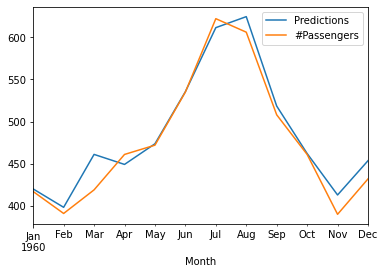

In [8]:
start = len(train) 
end = len(train) + len(test) - 1

# Predictions for one-year against the test set 
predictions = result.predict(start, end, 
							typ = 'levels').rename("Predictions") 

# plot predictions and actual values 
predictions.plot(legend = True) 
test['#Passengers'].plot(legend = True) 


In [10]:
# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 

# Calculate root mean squared error 
print("rmse", rmse(test["#Passengers"], predictions)) 

# Calculate mean squared error 
mean_squared_error(test["#Passengers"], predictions) 


rmse 17.14687134386706


294.0151968831293